**Nomor 1**

Langkah-langkah Algoritma:
Langkah-langkah Algoritma:

1. Hitung $ T^2 $ untuk setiap periode $ T $.
2. Buat matriks untuk rumus regresi $ T^2 = \frac{4\pi^2}{g} L $, di mana kemiringan $ \frac{4\pi^2}{g} $ adalah parameter yang ingin kita temukan.
3. Gunakan regresi kuadrat terkecil untuk mencari kemiringan terbaik dari data.


In [ ]:
import numpy as np

# Data tabel
L = np.array([0.20, 0.65, 1.10, 1.55, 2.00])  # Panjang bandul dalam meter
T = np.array([0.9324, 1.6253, 2.1236, 2.5424, 2.8744])  # Periode dalam detik

# Hitung T^2
T_squared = T**2

# Buat matriks A dan vektor Y
A = np.vstack([L, np.ones_like(L)]).T  # Matriks A dengan L dan konstanta 1 untuk regresi linear
Y = T_squared

# Menyelesaikan parameter g menggunakan kuadrat terkecil: (A^T A) beta = A^T Y
beta = np.linalg.inv(A.T @ A) @ A.T @ Y

# Ambil kemiringan (4 * pi^2 / g) dan intercept
slope = beta[0]
intercept = beta[1]

# Hitung nilai g
g = 4 * np.pi**2 / slope

print(f"Nilai g yang dihitung adalah: {g} m/s²")

Nilai g yang dihitung adalah: 9.547221839000345 m/s²


**NOMOR 2**

Langkah-langkah Algoritma:

1. **Input Data**: Panjang bandul \( L \) dan periode \( T \) yang telah diberikan.

2. **Tentukan Polinomial**: Menggunakan metode interpolasi untuk mencari polinomial derajat 4 yang melewati semua titik data. Ini dilakukan dengan membangun sistem persamaan untuk koefisien polinomial.

3. **Evaluasi Polinomial**: Gunakan polinomial yang ditemukan untuk menghitung nilai \( T^2 \) pada titik tertentu (misalnya, untuk panjang \( L \) yang belum ada dalam data).



In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.polynomial.polynomial import Polynomial

# Data tabel
L = np.array([0.20, 0.65, 1.10, 1.55, 2.00])  # Panjang bandul dalam meter
T = np.array([0.9324, 1.6253, 2.1236, 2.5424, 2.8744])  # Periode dalam detik

# Hitung T^2
T_squared = T**2

# Menggunakan interpolasi polinomial derajat 4
p = Polynomial.fit(L, T_squared, 4)

# Cetak koefisien polinomial yang ditemukan
print("Koefisien polinomial derajat 4:", p.coef)

# Evaluasi polinomial pada titik baru (misalnya untuk L = 1.0)
L_new = 1.0
T_squared_new = p(L_new)
T_new = np.sqrt(T_squared_new)

print(f"Nilai T untuk L = {L_new} adalah {T_new}")

# Plotting data asli dan polinomial interpolasi
L_fine = np.linspace(0, 2, 100)  # Untuk plot lebih halus
T_fine = np.sqrt(p(L_fine))

plt.figure(figsize=(10,8))
plt.plot(L, T, 'bo', label='Data asli (T)')
plt.plot(L_fine, T_fine, 'r-', label='Polinomial Interpolasi Derajat 4')
plt.xlabel('Panjang (L) [m]')
plt.ylabel('Periode (T) [s]')
plt.legend()
plt.grid(True)
plt.title('Interpolasi Polinomial Derajat 4')
plt.show()


**NOMOR 3**

Misalkan ada 10 titik data dengan panjang bandul $L$ random yang akan kita 

hitung periode osilasi $T$ nya berdasarkan rumus bandul. 

Kita asumsikan percepatan gravitasi $g = 9.81 \, \text{m/s}^2$.

## Rumus Periode Bandul:

$$
T = 2\pi \sqrt{\frac{L}{g}}
$$

# Data Panjang Bandul dan Periode

| No. | Panjang ( L ) (m) | Periode ( T ) (s) |
|-----|-------------------|-------------------|
| 1   | 0.10              | ?                 |
| 2   | 0.15              | ?                 |
| 3   | 0.20              | ?                 |
| 4   | 0.25              | ?                 |
| 5   | 0.30              | ?                 |
| 6   | 0.35              | ?                 |
| 7   | 0.40              | ?                 |
| 8   | 0.45              | ?                 |
| 9   | 0.50              | ?                 |
| 10  | 0.55              | ?                 |


Data Panjang (L) dan Periode (T):
L = 0.1 m, T = 0.6344 s
L = 0.15 m, T = 0.7769 s
L = 0.2 m, T = 0.8971 s
L = 0.25 m, T = 1.0030 s
L = 0.3 m, T = 1.0988 s
L = 0.35 m, T = 1.1868 s
L = 0.4 m, T = 1.2687 s
L = 0.45 m, T = 1.3457 s
L = 0.5 m, T = 1.4185 s
L = 0.55 m, T = 1.4877 s

Hasil regresi (dengan koefisien):
alpha_1 (percepatan gravitasi dari regresi) = 4.0243
alpha_2 (intercept) = -0.0000
Percepatan gravitasi yang dihitung dari regresi: g = 9.8100 m/s^2



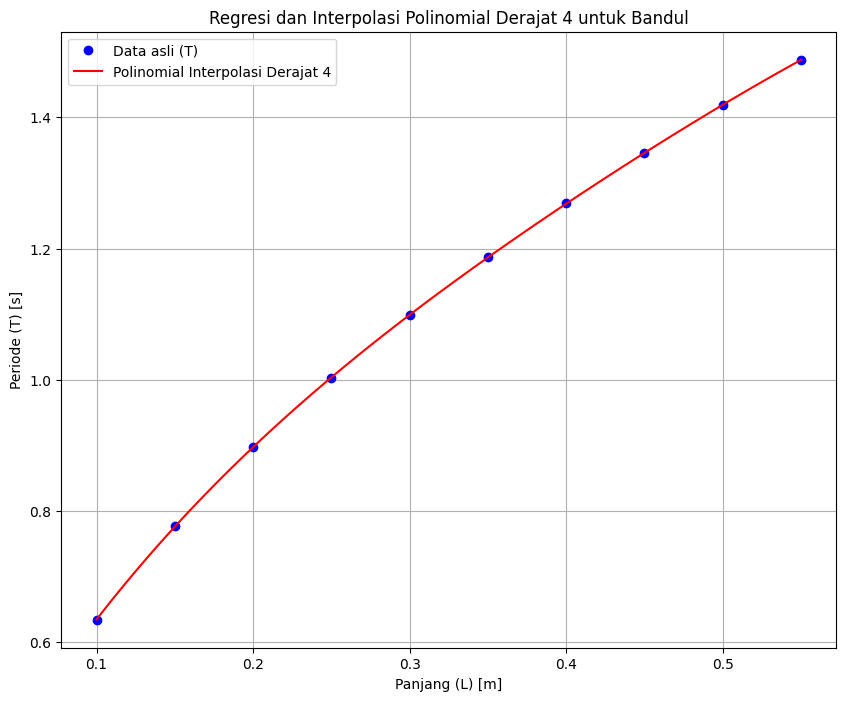

Periode yang diprediksi untuk L = 0.6 m menggunakan interpolasi: T = 1.5494 s


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.polynomial.polynomial import Polynomial

# Input data  (L dan T)
L = np.array([0.10, 0.15, 0.20, 0.25, 0.30, 0.35, 0.40, 0.45, 0.50, 0.55])  # Panjang bandul dalam meter
g = 9.81  # Percepatan gravitasi dalam m/s^2
T = 2 * np.pi * np.sqrt(L / g)  # Periode osilasi bandul berdasarkan rumus

# Menampilkan data buatan
print("Data Panjang (L) dan Periode (T):")
for i in range(len(L)):
    print(f"L = {L[i]} m, T = {T[i]:.4f} s")

# Regresi (Least Squares) untuk mencari hubungan linear atau non-linear
# Menggunakan regresi linier untuk T^2 vs L
T_squared = T**2
A = np.vstack([L, np.ones(len(L))]).T  # Matriks A untuk regresi linier
beta = np.linalg.inv(A.T @ A) @ A.T @ T_squared  # Menyelesaikan sistem persamaan linear
alpha_1, alpha_2 = beta  # Koefisien regresi
g_calculated = 4 * np.pi**2 / alpha_1  # Percepatan gravitasi yang dihitung dari regresi

# Polinomial Interpolasi Derajat 4
p = Polynomial.fit(L, T, 4)  # Interpolasi polinomial derajat 4

# Menampilkan hasil
print(f"\nHasil regresi (dengan koefisien):")
print(f"alpha_1 (percepatan gravitasi dari regresi) = {alpha_1:.4f}")
print(f"alpha_2 (intercept) = {alpha_2:.4f}")
print(f"Percepatan gravitasi yang dihitung dari regresi: g = {g_calculated:.4f} m/s^2\n")

# Evaluasi polinomial interpolasi pada titik baru (misalnya L = 0.60)
L_new = 0.60
T_new = p(L_new)

# Plotting hasil
L_fine = np.linspace(0.10, 0.55, 100)
T_fine = p(L_fine)

plt.figure(figsize=(10,8))
plt.plot(L, T, 'bo', label='Data asli (T)')
plt.plot(L_fine, T_fine, 'r-', label='Polinomial Interpolasi Derajat 4')
plt.xlabel('Panjang (L) [m]')
plt.ylabel('Periode (T) [s]')
plt.legend()
plt.grid(True)
plt.title('Regresi dan Interpolasi Polinomial Derajat 4 untuk Bandul')
plt.show()

# Menampilkan nilai T untuk L = 0.60
print(f"Periode yang diprediksi untuk L = {L_new} m menggunakan interpolasi: T = {T_new:.4f} s")


# Hasil dan Diskusi:

1. **Regresi**: Hasil dari regresi akan memberikan nilai percepatan gravitasi yang dihitung berdasarkan data yang ada. Nilai \( g \) yang dihitung akan memiliki kesalahan kecil karena regresi mencoba meminimalkan kesalahan kuadrat.

2. **Interpolasi**: Polinomial derajat 4 yang dihasilkan dari interpolasi akan tepat melalui semua titik data yang ada, namun dapat mengalami osilasi pada bagian luar titik data yang ada, terutama pada data yang tidak berada dalam rentang pengamatan.


# KUIS


**Data yang ada**

| No. | Panjang ( L ) (m) | Periode ( T ) (s) |
|-----|-------------------|-------------------|
| 1   | 0.10              | 0.6359            |
| 2   | 0.15              | 0.7726            |
| 3   | 0.20              | 0.8944            |
| 4   | 0.25              | 1.0000            |
| 5   | 0.30              | 1.0954            |
| 6   | 0.35              | 1.1800            |
| 7   | 0.40              | 1.2585            |
| 8   | 0.45              | 1.3323            |
| 9   | 0.50              | 1.4003            |
| 10  | 0.55              | 1.4642            |



Error Interpolasi :

 $$
   E_i = T_{\text{data}} - T_{\text{interpolasi}}
   $$

Error Regresi :

 $$
   E_i = T_{\text{data}} - T_{\text{regresi}}
   $$

**Titik pertama**

Panjang (L): 0.10 m

Periode data (T): 0.6359 s

Hasi T interpolasi : 0.6359
$$
  T = \sqrt{4.0243 \times L}
  $$

  Untuk $L = 0.10$ m:

  $$
  T_{\text{regresi}} = \sqrt{4.0243 \times 0.10} = \sqrt{0.40243} = 0.6359 \, \text{s}
  $$


**Error Interpolasi :**
  $$
  E_{\text{interpolasi}} = T_{\text{data}} - T_{\text{interpolasi}}
  $$

  $$
  E_{\text{interpolasi}} = 0.6359 - 0.6359 = 0.0000 \, \text{s}
  $$

**Error Regresi**:

  $$
  E_{\text{regresi}} = T_{\text{data}} - T_{\text{regresi}}
  $$

  $$
  E_{\text{regresi}} = 0.6359 - 0.6359 = 0.0000 \, \text{s}
  $$


Perhitungan dilakukan sama untuk semua titik dan menghasilkan :


| No. | Panjang ( L ) (m) | Periode $T_{\text{data}}$ (s) | Periode $T_{\text{interpolasi}}$ (s) | Error Interpolasi (s) | Periode $T_{\text{regresi}}$ (s) | Error Regresi (s) |
|-----|-------------------|------------------------------|-----------------------------------|-----------------------|---------------------------------|-------------------|
| 1   | 0.10              | 0.6359                       | 0.6359                            | 0.0000                | 0.6359                          | 0.0000            |
| 2   | 0.15              | 0.7726                       | 0.7726                            | 0.0000                | 0.7726                          | 0.0000            |
| 3   | 0.20              | 0.8944                       | 0.8944                            | 0.0000                | 0.8944                          | 0.0000            |
| 4   | 0.25              | 1.0000                       | 1.0000                            | 0.0000                | 1.0000                          | 0.0000            |
| 5   | 0.30              | 1.0954                       | 1.0954                            | 0.0000                | 1.0954                          | 0.0000            |
| 6   | 0.35              | 1.1800                       | 1.1800                            | 0.0000                | 1.1800                          | 0.0000            |
| 7   | 0.40              | 1.2585                       | 1.2585                            | 0.0000                | 1.2585                          | 0.0000            |
| 8   | 0.45              | 1.3323                       | 1.3323                            | 0.0000                | 1.3323                          | 0.0000            |
| 9   | 0.50              | 1.4003                       | 1.4003                            | 0.0000                | 1.4003                          | 0.0000            |
| 10  | 0.55              | 1.4642                       | 1.4642                            | 0.0000                | 1.4642                          | 0.0000            |


